In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import path

In [2]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
DATA_DIR=path.Path("../data/")
ARTIFACT_DIR=path.Path("../artifacts/")

In [3]:
train=pd.read_csv(DATA_DIR+"train.csv")
test=pd.read_csv(DATA_DIR+"test.csv")
train.head()

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,loan_purpose,insurance_percent,co-borrower_credit_score,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
0,268055008619,Z,"Turner, Baldwin and Rhodes",4.250,214000,360,2012-03-01,05/2012,95,1.0,22.0,694.0,C86,30.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,672831657627,Y,"Swanson, Newton and Miller",4.875,144000,360,2012-01-01,03/2012,72,1.0,44.0,697.0,B12,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,1
2,742515242108,Z,Thornton-Davis,3.250,366000,180,2012-01-01,03/2012,49,1.0,33.0,780.0,B12,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,601385667462,X,OTHER,4.750,135000,360,2012-02-01,04/2012,46,2.0,44.0,633.0,B12,0.0,638.0,0.0,0,0,0,0,0,0,0,0,1,1,1,1,1
4,273870029961,X,OTHER,4.750,124000,360,2012-02-01,04/2012,80,1.0,43.0,681.0,C86,0.0,0.0,0.0,0,1,2,3,4,5,6,7,8,9,10,11,1


In [4]:
class1=train[train.m13==1]
class1

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,loan_purpose,insurance_percent,co-borrower_credit_score,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
0,268055008619,Z,"Turner, Baldwin and Rhodes",4.250,214000,360,2012-03-01,05/2012,95,1.0,22.0,694.0,C86,30.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,672831657627,Y,"Swanson, Newton and Miller",4.875,144000,360,2012-01-01,03/2012,72,1.0,44.0,697.0,B12,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,1
2,742515242108,Z,Thornton-Davis,3.250,366000,180,2012-01-01,03/2012,49,1.0,33.0,780.0,B12,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,601385667462,X,OTHER,4.750,135000,360,2012-02-01,04/2012,46,2.0,44.0,633.0,B12,0.0,638.0,0.0,0,0,0,0,0,0,0,0,1,1,1,1,1
4,273870029961,X,OTHER,4.750,124000,360,2012-02-01,04/2012,80,1.0,43.0,681.0,C86,0.0,0.0,0.0,0,1,2,3,4,5,6,7,8,9,10,11,1
5,769060024464,Y,Browning-Hart,4.375,150000,360,2012-02-01,04/2012,80,1.0,46.0,675.0,C86,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,1
6,148071614687,X,OTHER,4.000,59000,360,2012-02-01,04/2012,95,1.0,44.0,723.0,C86,30.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1
7,853383953266,Y,Browning-Hart,4.500,319000,300,2012-01-01,03/2012,62,1.0,45.0,652.0,A23,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,1
8,423590072335,X,Browning-Hart,4.000,520000,360,2012-03-01,05/2012,76,1.0,35.0,808.0,C86,0.0,0.0,0.0,0,0,0,0,1,0,1,0,1,2,0,1,1
9,308990846816,X,OTHER,4.000,214000,360,2012-01-01,03/2012,95,2.0,41.0,702.0,A23,30.0,700.0,0.0,0,0,0,0,0,1,1,1,1,1,2,2,1


In [5]:
train.groupby('financial_institution').sum()

,loan_id,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,insurance_percent,co-borrower_credit_score,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
financial_institution,,,,,,,,,,,,,,,,,,,,,,,,
Anderson-Taylor,274230557192949,2043.750,90465000,173880,34101,765.0,15153.0,371074.0,1327.0,218087.0,0.0,1,1,1,2,1,0,1,0,4,3,7,2,3
Browning-Hart,17491453799431780,126643.824,7200659000,10100195,2198837,49890.0,996732.0,24544732.0,105052.0,14000885.0,0.0,157,89,81,68,114,113,143,158,172,210,220,264,175
Chapman-Mcmahon,215229649820025,1242.780,98174000,56520,19645,651.0,12240.0,302368.0,256.0,206226.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0
"Cole, Brooks and Vincent",897882685033860,6779.445,330658000,497580,113070,2573.0,53848.0,1251587.0,5442.0,716307.0,24.0,0,2,2,5,4,1,4,2,6,12,15,18,12
Edwards-Hoffman,2675010346186366,18658.708,1125281000,1425060,321544,7616.0,154650.0,3742341.0,8722.0,2142277.0,35.0,15,12,11,15,33,22,29,23,29,29,33,41,41
"Martinez, Duffy and Bird",2575874188093395,18259.285,926741000,1280100,301997,7615.0,141602.0,3632204.0,10379.0,2245194.0,12.0,19,9,14,10,13,13,13,8,13,13,18,21,23
"Miller, Mcclure and Allen",1748944196039511,12522.209,678704000,841020,206428,5010.0,104991.0,2415487.0,5523.0,1427905.0,82.0,1,6,5,12,17,10,14,26,21,33,35,44,19
Nicholson Group,1153870790407058,7901.075,487351000,536476,134592,3391.0,65005.0,1624480.0,3336.0,984943.0,0.0,8,5,4,6,10,9,11,13,15,15,19,14,11
OTHER,27325722803673072,189076.197,9568845000,14330252,3366246,79853.0,1507961.0,38228035.0,149134.0,23330359.0,131.0,123,84,76,103,164,163,206,254,287,335,354,396,269


In [11]:
class0=train[train.m13==0]
class0

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,loan_purpose,insurance_percent,co-borrower_credit_score,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
636,909205437397,Y,Browning-Hart,3.875,198000,360,2012-01-01,04/2012,51,2.0,23.0,812.0,A23,0.0,790.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0
637,979715158037,Y,Browning-Hart,3.750,300000,360,2012-02-01,04/2012,49,2.0,32.0,800.0,B12,0.0,755.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0
638,742448338648,X,"Martinez, Duffy and Bird",3.375,305000,180,2012-02-01,04/2012,52,2.0,32.0,811.0,A23,0.0,809.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0
639,424791950211,Y,OTHER,3.875,234000,360,2012-02-01,04/2012,70,2.0,19.0,780.0,B12,0.0,809.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0
640,263803261825,X,OTHER,3.990,153000,240,2012-01-01,03/2012,89,2.0,18.0,778.0,A23,12.0,773.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0
641,560931857539,X,OTHER,3.875,170000,240,2012-01-01,03/2012,72,2.0,20.0,762.0,A23,0.0,784.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0
642,735288385606,Y,OTHER,3.250,245000,180,2012-02-01,04/2012,58,2.0,35.0,780.0,A23,0.0,797.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0
643,664349291216,Y,"Swanson, Newton and Miller",4.000,185000,300,2012-01-01,03/2012,37,2.0,16.0,797.0,A23,0.0,797.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0
644,482409450145,X,OTHER,3.750,325000,240,2012-01-01,03/2012,68,2.0,30.0,790.0,A23,0.0,730.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0
645,257821924575,Y,Edwards-Hoffman,4.000,235000,360,2012-02-01,04/2012,79,2.0,27.0,798.0,A23,0.0,796.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Here my aim is to find different pattern in class 0 and class 1

In [18]:
from witwidget.notebook.visualization import WitConfigBuilder
from witwidget.notebook.visualization import WitWidget


C:\Users\gurunath.lv\AppData\Local\Continuum\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


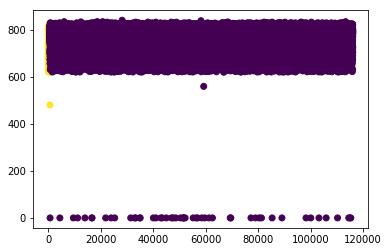

In [6]:
plt.scatter(train.index,train.borrower_credit_score,c=train.m13)

In [11]:
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.preprocessing.LabelEncoder

In [9]:
train.columns[-13:-1],test.columns[-12:]

(Index(['m1', 'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12'], dtype='object'),
 Index(['m1', 'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12'], dtype='object'))

In [23]:
knn=KNeighborsClassifier(n_neighbors=67,n_jobs=-1)

In [24]:
knn.fit(train.iloc[:,-13:-1],train.iloc[:,-1])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=67, p=2,
           weights='uniform')

In [25]:
pred=knn.predict(test.iloc[:,-12:])

In [27]:
DATA_DIR="../data/"
def submission(pred,filename="submission_catboost.csv"):
    submission=pd.DataFrame()
    submission['loan_id']=test['loan_id']#.as_data_frame()['loan_id'].values
    submission['m13']=pred
    submission.to_csv(DATA_DIR+filename,index=False)

In [28]:
submission(pred,"knn67.csv")

In [26]:
from collections import Counter
Counter(pred)

Counter({1: 35355, 0: 511})

In [29]:
from sklearn.neural_network import MLPClassifier

In [39]:
mlp=MLPClassifier(hidden_layer_sizes=(20,100,20),early_stopping=True,verbose=True,validation_fraction=0.3,
                  random_state=5,learning_rate='adaptive')
mlp.fit(train.iloc[:,-13:-1],train.iloc[:,-1])

Iteration 1, loss = 0.06875479
Validation score: 0.996065
Iteration 2, loss = 0.02063991
Validation score: 0.996295
Iteration 3, loss = 0.02032635
Validation score: 0.996324
Iteration 4, loss = 0.02017596
Validation score: 0.996410
Iteration 5, loss = 0.02004251
Validation score: 0.996295
Iteration 6, loss = 0.01999066
Validation score: 0.996266
Iteration 7, loss = 0.01999423
Validation score: 0.996352
Iteration 8, loss = 0.01998071
Validation score: 0.996123
Iteration 9, loss = 0.01987045
Validation score: 0.996151
Iteration 10, loss = 0.01988253
Validation score: 0.996238
Iteration 11, loss = 0.01981308
Validation score: 0.996324
Iteration 12, loss = 0.01980327
Validation score: 0.996266
Iteration 13, loss = 0.01972504
Validation score: 0.996123
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=(20, 100, 20), learning_rate='adaptive',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=5, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.3, verbose=True, warm_start=False)

In [40]:
pred=mlp.predict(test.iloc[:,-12:])

In [42]:
Counter(pred)

Counter({0: 35784, 1: 82})

In [41]:
submission(pred,"mlp.csv")

In [43]:
train.columns

Index(['loan_id', 'source', 'financial_institution', 'interest_rate', 'unpaid_principal_bal', 'loan_term', 'origination_date', 'first_payment_date', 'loan_to_value', 'number_of_borrowers', 'debt_to_income_ratio', 'borrower_credit_score', 'loan_purpose', 'insurance_percent', 'co-borrower_credit_score', 'insurance_type', 'm1', 'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12', 'm13'], dtype='object')

In [44]:
pd.get_dummies(train['source'])

,X,Y,Z
0,0,0,1
1,0,1,0
2,0,0,1
3,1,0,0
4,1,0,0
5,0,1,0
6,1,0,0
7,0,1,0
8,1,0,0
9,1,0,0


In [45]:
pd.get_dummies(train['financial_institution'])

,Anderson-Taylor,Browning-Hart,Chapman-Mcmahon,"Cole, Brooks and Vincent",Edwards-Hoffman,"Martinez, Duffy and Bird","Miller, Mcclure and Allen",Nicholson Group,OTHER,Richards-Walters,Richardson Ltd,"Romero, Woods and Johnson","Sanchez, Hays and Wilkerson",Sanchez-Robinson,Suarez Inc,"Swanson, Newton and Miller","Taylor, Hunt and Rodriguez",Thornton-Davis,"Turner, Baldwin and Rhodes"
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
7,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
